# Autoencoder

In [65]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import sys, os
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json


ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f

ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [66]:
import dataframe_exploration

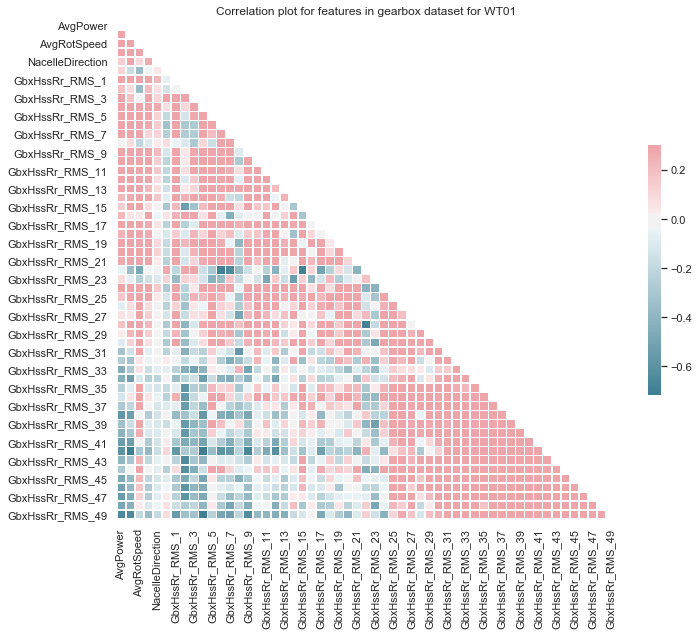

In [67]:
dataframe_exploration.create_save_correlation_plot('/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG01.csv', 
                                                   "Correlation_plot_wtg01_Gearbox", "Correlation plot for features in gearbox dataset for WT01")

In [68]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG01.csv'
data1 = pd.read_csv(path)
print(data1.shape)
data1.head()

(279, 55)


,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,GbxHssRr_RMS_4,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2500.973877,3090.899902,1511.167622,13.0,232.899994,0.529806,0.396315,0.926229,0.784296,1.689014,...,1.107841,1.689887,1.884569,2.108670,3.132671,2.855787,3.668806,3.355471,1.887401,0.927872
1,2565.207520,2660.399902,1472.724506,9.9,53.900002,0.519244,0.297510,0.857385,0.771858,1.000674,...,1.078498,1.583077,1.868731,2.318457,2.936169,2.918674,3.745910,3.281026,1.667363,0.995451
2,2861.552002,3301.899902,1499.039959,12.0,262.399994,0.537803,0.492195,0.918529,0.819567,2.557961,...,1.044200,1.527561,1.749744,2.021772,2.802417,2.649571,3.407016,3.057615,1.654562,0.866629
3,3073.377930,3307.399902,1492.741102,15.1,245.600006,0.655595,0.499201,0.900849,0.873749,2.765626,...,1.051084,1.471833,1.688985,2.041691,2.650884,2.545420,3.355640,3.010029,1.543250,0.827142
4,2630.640625,2335.399902,1458.801583,7.3,296.399994,0.552800,0.312219,0.926188,0.819309,1.080637,...,1.040459,1.557635,2.074641,2.154511,2.639528,2.810245,3.425632,3.298253,1.666922,0.955386


In [69]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG02.csv'
data2 = pd.read_csv(path)
print(data2.shape)
data2.head()

(286, 56)


,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2818.207520,3291.300049,1487.871218,14.2,226.699997,6.389500,0.404392,0.258909,0.811581,0.344739,...,1.101426,1.969857,1.778854,2.673142,3.386242,2.750154,1.419267,0.809299,0.444020,0.272188
1,2528.062988,2454.500000,1471.267571,10.6,231.699997,5.061433,0.532580,0.244108,1.221325,0.346431,...,1.106000,2.131452,1.824046,2.082840,2.086788,1.563331,0.788437,0.436628,0.294574,0.181487
2,2500.473145,1772.500000,1432.996560,8.4,284.600006,1.857597,0.478452,0.210531,1.090423,0.360744,...,0.967446,1.962500,1.463750,1.369159,1.247210,1.092017,0.519553,0.320830,0.221710,0.146560
3,2555.221924,2492.899902,1465.589029,9.0,132.000000,6.799224,0.512141,0.226217,1.160659,0.358593,...,1.068143,2.376538,1.979047,2.345064,2.218439,1.995184,0.850978,0.474515,0.348262,0.198423
4,3065.522217,3304.800049,1476.364735,12.7,245.000000,6.844513,0.386640,0.276154,1.027501,0.356752,...,1.155076,1.865711,1.766413,2.519427,3.441490,2.888474,1.341962,0.759380,0.538935,0.295528


In [70]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG03.csv'
data3 = pd.read_csv(path)
print(data3.shape)
data3.head()

(284, 55)


,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,GbxHssRr_RMS_4,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2953.059326,3062.600098,1488.567668,12.2,211.300003,0.390282,0.315728,0.603908,0.369451,0.574504,...,2.035909,2.305540,2.283667,2.588069,3.470153,2.404919,1.292162,0.834689,0.448532,0.220187
1,2506.833740,2213.600098,1455.100147,9.8,210.300003,0.463516,0.248339,0.590697,0.329584,0.457916,...,2.326461,2.544607,2.235011,2.399166,2.841204,2.206481,1.002734,0.570204,0.369731,0.177383
2,2638.403320,2538.399902,1471.569062,10.2,36.900002,0.428963,0.267683,0.550062,0.370543,0.543707,...,2.454726,2.610456,2.332728,2.421368,3.103490,2.372697,1.033393,0.703453,0.376279,0.182246
3,2603.288818,2243.100098,1453.689477,9.9,110.800003,0.476629,0.227889,0.530220,0.345882,0.487592,...,2.328120,2.681551,2.241917,2.307687,2.758945,1.844706,0.916697,0.545712,0.346259,0.162629
4,3289.359131,3477.300049,1473.524626,13.1,229.699997,0.440963,0.308199,0.901247,0.363823,0.615123,...,2.276761,2.080086,1.935870,2.498416,3.261097,2.315266,1.290084,0.842055,0.554681,0.225183


In [71]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG04.csv'
data4 = pd.read_csv(path)
print(data4.shape)
data4.describe()

(294, 55)


,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,GbxHssRr_RMS_4,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,2837.946865,2726.498978,1470.381676,11.040816,203.331973,0.506665,0.340638,1.046609,0.674565,1.541304,...,2.039976,2.841856,3.413102,4.588716,5.840880,4.454606,2.584203,1.658318,0.835892,0.501949
std,290.744676,529.030421,50.721702,2.854115,79.954094,0.150446,0.072144,0.131594,0.033436,0.684814,...,0.211083,0.325586,0.313263,0.423446,0.524428,0.474214,0.280652,0.225530,0.104704,0.064458
min,2500.159180,-55.799999,730.071650,7.300000,8.900000,0.260099,0.265793,0.288832,0.325300,0.440042,...,0.282713,0.373643,0.414074,0.616348,1.004734,0.846947,0.499731,0.397502,0.247516,0.124866
25%,2586.503052,2396.324951,1458.879461,9.325000,139.175003,0.405443,0.284665,1.012162,0.660266,0.932652,...,1.950477,2.647980,3.272067,4.377752,5.601894,4.140346,2.427917,1.547768,0.782557,0.463238
50%,2731.483765,2745.500000,1470.226640,10.150000,179.300003,0.470054,0.308980,1.051218,0.676272,1.250963,...,2.053329,2.870150,3.458780,4.657913,5.869984,4.420236,2.583231,1.678366,0.832158,0.499933
75%,3110.466309,3267.075012,1485.439291,11.700000,269.125008,0.544296,0.390384,1.099640,0.694523,2.146999,...,2.154015,3.067696,3.605843,4.849579,6.131503,4.734051,2.792891,1.769563,0.890925,0.545212
max,3314.773193,3434.000000,1599.374684,28.500000,358.799988,1.015997,0.547681,2.239035,0.748580,3.473547,...,2.766571,3.653815,4.047211,5.509260,7.604062,5.933234,3.356469,2.337119,1.167703,0.782867


## Working with WT2

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(data2)
df_2_scaled = pd.DataFrame(scaled_data2,columns = data2.columns)
df_2_scaled.shape

(286, 56)

In [73]:
def train_test_split(df, percentage):
    split_index = int(np.floor(df.shape[0]) * percentage)
    train = df[:split_index]
    test = df[split_index:].reset_index(drop=True)
    return train, test

In [74]:
X_train, X_test =  train_test_split(df_2_scaled,.50)
print(X_test)
X_train.shape
X_train.shape
X_train = np.array(X_train)
X_test = np.array(X_test)
X_test.shape

     AvgPower  ActPower  AvgRotSpeed  WindSpeed  NacelleDirection  \
0    0.107852  0.676199     0.898694   0.212435          0.922154   
1    0.046266  0.684011     0.899013   0.176166          0.362165   
2    0.051685  0.693933     0.901072   0.621762          0.390346   
3    0.004894  0.717084     0.893961   0.181347          0.292411   
4    0.273884  0.940782     0.937504   0.145078          0.976283   
..        ...       ...          ...        ...               ...   
138  0.023249  0.824713     0.901574   0.139896          0.382254   
139  0.503907  0.956264     0.951759   0.274611          0.750000   
140  0.079539  0.635656     0.880441   0.145078          0.938616   
141  0.324374  0.850687     0.889681   0.155440          0.810268   
142  0.508726  0.557935     0.859403   0.129534          0.912667   

     RMS_component_interval  GbxHssRr_RMS_0  GbxHssRr_RMS_1  GbxHssRr_RMS_2  \
0                  0.430203        0.570646        0.263033        0.182160   
1            

(143, 56)

In [75]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.callbacks import TensorBoard


input_dim = X_train.shape[1]
encoding_dim = 8 # First layer
hidden_dim = int(encoding_dim/2) # Hidden layer
nb_epoch = 100
batch_size = 10
learning_rate = 0.1

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)

decoder = Dense(hidden_dim,activation='relu')(encoder)
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation="tanh")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer = 'adam',loss="mean_squared_error")


In [76]:
history = autoencoder.fit(X_train, X_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    shuffle=True,
                    validation_data=(X_test, X_test))

Train on 143 samples, validate on 143 samples
Epoch 1/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3674 - val_loss: 0.3340
Epoch 2/100
143/143 [==============================] - 0s 337us/step - loss: 0.3236 - val_loss: 0.2769
Epoch 3/100
143/143 [==============================] - 0s 337us/step - loss: 0.2512 - val_loss: 0.1925
Epoch 4/100
143/143 [==============================] - 0s 323us/step - loss: 0.1673 - val_loss: 0.1210
Epoch 5/100
143/143 [==============================] - 0s 384us/step - loss: 0.1010 - val_loss: 0.0719
Epoch 6/100
143/143 [==============================] - 0s 329us/step - loss: 0.0593 - val_loss: 0.0433
Epoch 7/100
143/143 [==============================] - 0s 381us/step - loss: 0.0364 - val_loss: 0.0292
Epoch 8/100
143/143 [==============================] - 0s 389us/step - loss: 0.0254 - val_loss: 0.0225
Epoch 9/100
143/143 [==============================] - 0s 339us/step - loss: 0.0203 - val_loss: 0.0198
Epoch 10/100
143/143 [=======

143/143 [==============================] - 0s 457us/step - loss: 0.0086 - val_loss: 0.0103
Epoch 80/100
143/143 [==============================] - 0s 368us/step - loss: 0.0086 - val_loss: 0.0103
Epoch 81/100
143/143 [==============================] - 0s 294us/step - loss: 0.0086 - val_loss: 0.0103
Epoch 82/100
143/143 [==============================] - 0s 368us/step - loss: 0.0086 - val_loss: 0.0103
Epoch 83/100
143/143 [==============================] - 0s 364us/step - loss: 0.0086 - val_loss: 0.0102
Epoch 84/100
143/143 [==============================] - 0s 313us/step - loss: 0.0085 - val_loss: 0.0102
Epoch 85/100
143/143 [==============================] - 0s 428us/step - loss: 0.0085 - val_loss: 0.0103
Epoch 86/100
143/143 [==============================] - 0s 404us/step - loss: 0.0085 - val_loss: 0.0102
Epoch 87/100
143/143 [==============================] - 0s 328us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 88/100
143/143 [==============================] - 0s 294us/step - loss:

dict_keys(['val_loss', 'loss'])


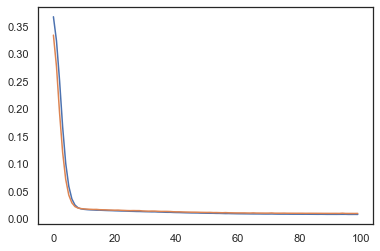

In [77]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [83]:
df_fake = pd.read_csv('../utils/fake_data_points.csv')
df_fake

,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2818.207520,3291.300049,1487.871218,14.2,226.699997,6.389500,3.235140,2.071272,6.492646,2.757909,...,1.101426,1.969857,1.778854,2.673142,3.386242,2.750154,1.419267,0.809299,0.444020,0.272188
1,2528.062988,2454.500000,1471.267571,10.6,231.699997,5.061433,4.260639,1.952866,9.770601,2.771450,...,1.106000,2.131452,1.824046,2.082840,2.086788,1.563331,0.788437,0.436628,0.294574,0.181487
2,2500.473145,1772.500000,1432.996560,8.4,284.600006,1.857597,3.827613,1.684249,8.723386,2.885954,...,0.967446,1.962500,1.463750,1.369159,1.247210,1.092017,0.519553,0.320830,0.221710,0.146560
3,2555.221924,2492.899902,1465.589029,9.0,132.000000,6.799224,4.097127,1.809736,9.285274,2.868745,...,1.068143,2.376538,1.979047,2.345064,2.218439,1.995184,0.850978,0.474515,0.348262,0.198423
4,3065.522217,3304.800049,1476.364735,12.7,245.000000,6.844513,3.093120,2.209234,8.220009,2.854013,...,1.155076,1.865711,1.766413,2.519427,3.441490,2.888474,1.341962,0.759380,0.538935,0.295528
5,2579.510986,2786.899902,1469.441078,11.3,301.100006,7.930184,3.260113,2.110412,6.885093,2.958318,...,1.160586,2.201416,1.875874,2.447637,3.014397,2.499477,1.200119,0.711053,0.435755,0.275101
6,2537.796631,2466.000000,1493.188802,10.0,131.500000,4.659376,4.141029,1.978285,4.273664,2.660971,...,1.198744,2.199523,2.190827,2.596931,2.703204,1.916277,1.012641,0.576606,0.344559,0.218208
7,2588.696533,2586.899902,1493.971465,11.1,229.600006,4.860157,3.799227,2.238056,4.293033,2.709079,...,1.338610,2.178644,1.917163,2.785755,3.027529,2.128784,0.977825,0.608689,0.397932,0.234199
8,3300.607666,2901.800049,1463.211760,8.3,92.699997,8.713964,3.409794,2.024514,6.977443,2.971451,...,1.140399,2.190679,1.957966,2.462485,2.796271,2.590859,1.137157,0.600736,0.447692,0.247014
9,2534.070312,2769.000000,1498.249483,9.8,141.899994,4.653982,4.306196,2.014872,5.416668,2.724629,...,1.235603,2.258962,2.083371,2.619901,2.712242,1.875764,0.948645,0.556748,0.351959,0.212861


In [86]:
a = np.array(df_fake)
a.shape

(10, 56)

In [113]:
scaler = MinMaxScaler()
scaled_data2_fake = scaler.fit_transform(df_fake)
df_2_scaled_fake = pd.DataFrame(scaled_data2_fake,columns = df_fake.columns)
df_2_scaled_fake
a = np.array(df_2_scaled_fake)

print(a[0].T.shape)
for i in range(a.shape[1]):
    result = autoencoder.evaluate(a[i].T,a[i].T,batch_size = 1)
    print(result)
    print( )
    # Fiks dette! 


(56,)


ValueError: Error when checking input: expected input_11 to have shape (56,) but got array with shape (1,)

In [93]:
result = autoencoder.evaluate(a,a,batch_size = 10)
result


0.08973228931427002